In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)
library(ggplot2)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\RtmpcL5IPY\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.2"

In [19]:
data = read.csv("IBM.csv",header=T)
head(data, n=10)

Date = as.Date(as.character(data$Date), format="%m/%d/%Y")
data$Date=date

## Dates: April 7 1964, 27 July 1993, May 1 2005, Aug 5 2015, Feb 18 2016
ficom = which(Date=="1964-04-07")
loss = which(Date=="1993-07-27")
lenovo = which(Date=="2005-05-02")
healthm = which(Date=="2015-08-05")
truven = which(Date=="2016-02-18")
alldates = c(ficom,loss,lenovo,healthm,truven)
alldates

Date,Open,High,Low,Close,Volume,AdjClose
4/18/2017,170.79,171.69,169.83,170.05,6194800,170.05
4/17/2017,169.75,171.30,169.62,171.10,3676500,171.10
4/13/2017,169.92,171.36,169.53,169.53,3203900,169.53
4/12/2017,171.04,171.20,170.02,170.66,3276900,170.66
4/11/2017,170.65,171.23,168.98,170.58,4890200,170.58
4/10/2017,172.53,172.56,171.00,171.20,3715300,171.20
4/7/2017,172.08,172.93,171.28,172.14,3556000,172.14
4/6/2017,173.47,173.47,172.25,172.45,3416100,172.45
4/5/2017,174.70,176.33,172.81,172.88,6199500,172.88
4/4/2017,173.52,174.96,173.26,174.52,3097400,174.52


[1] 13350  5976  3012   429   294

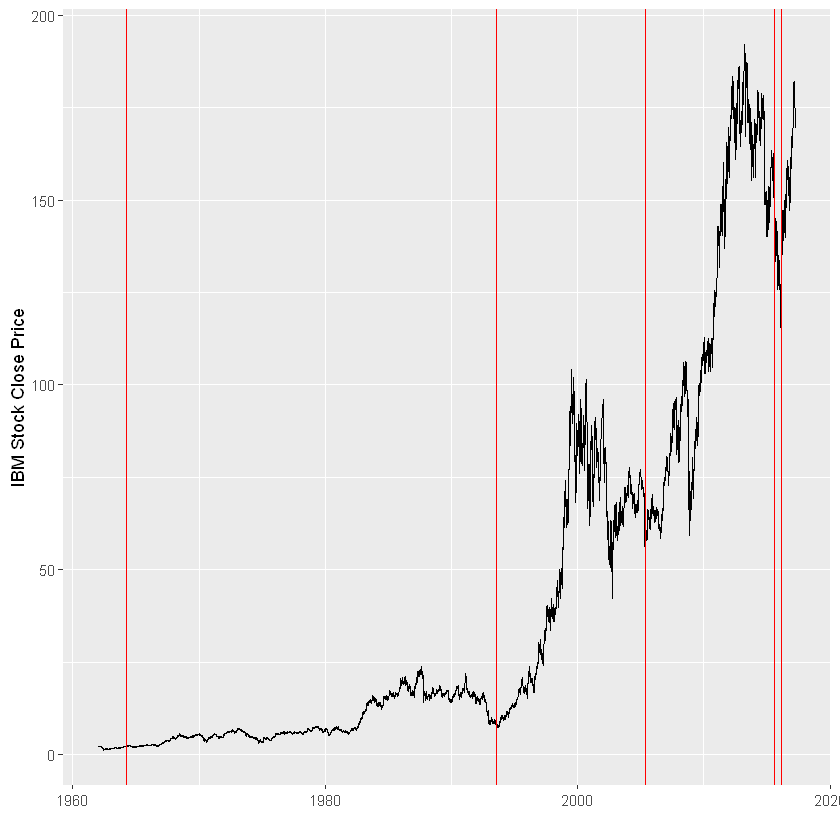

In [21]:
par(mfrow=c(2,2))
ggplot(data, aes(data$Date, data$AdjClose)) + geom_line() + xlab("") + ylab("IBM Stock Close Price")+
geom_vline(xintercept = as.numeric(data$Date[alldates]), col="red")

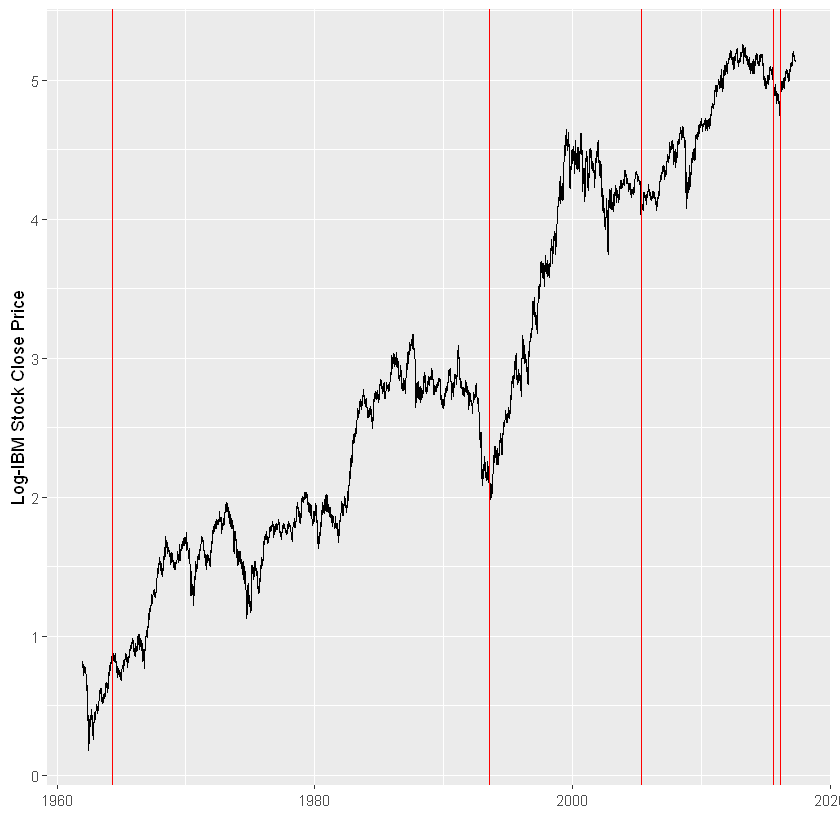

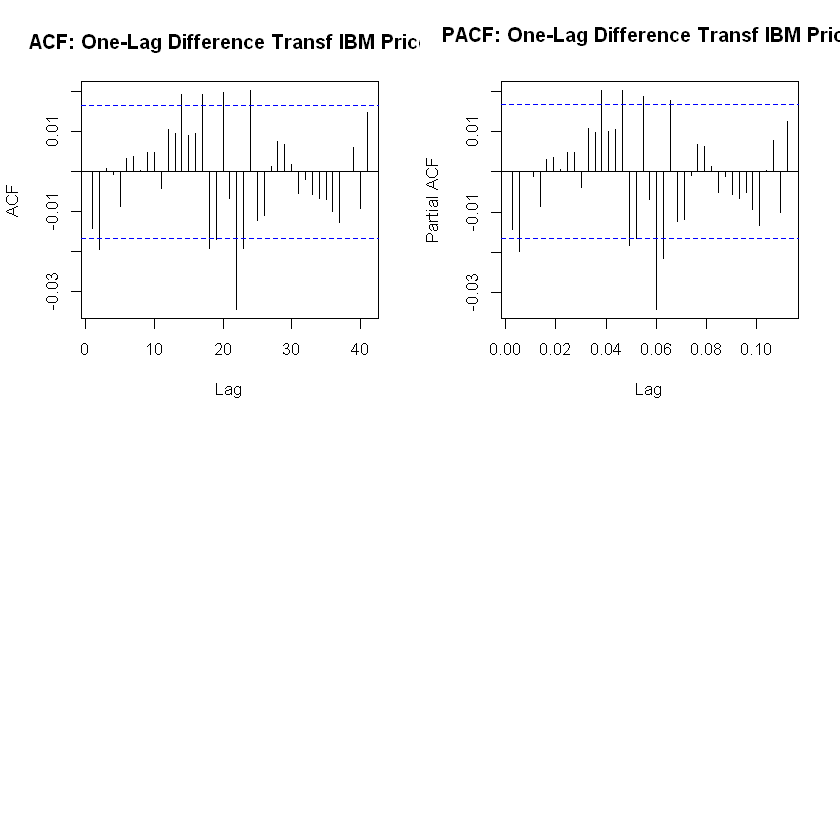

In [42]:
## IBM Stock Price: Non-constant variance => Transform
AdjClose.tr = log(data$AdjClose)
ggplot(data, aes(Date, AdjClose.tr)) + geom_line() + xlab("") + ylab("Log-IBM Stock Close Price")+
geom_vline(xintercept = as.numeric(Date[alldates]), col="red")

price = ts(rev(AdjClose.tr),start=c(1962,1,2),frequency=365.25)
## Differencing to Remove Trend
diff.ts.price = diff(price)

par(mfrow=c(2,2))
acf(as.vector(diff.ts.price),main="ACF: One-Lag Difference Transf IBM Price")
pacf(diff.ts.price,main="PACF: One-Lag Difference Transf IBM Price")



In [33]:

test_modelA <- function(p,d,q){
  model = arima(price, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:1){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

[1] "0 0 0 48562.1618418175"
[1] "0 0 1 29471.2039658607"
[1] "0 0 2 12085.2177974189"
[1] "0 0 3 -2412.3017080848"
[1] "0 1 0 -75868.3770015383"
[1] "0 1 1 -75869.1705028396"
[1] "0 1 2 -75872.2393290597"
[1] "0 1 3 -75870.2496377973"
[1] "1 0 0 -75859.6317906961"
[1] "1 0 1 -75870.9200756554"
[1] "1 0 3 -75871.6701367292"
[1] "1 1 0 -75869.0633443606"
[1] "1 1 1 -75867.1191074083"
[1] "1 1 2 -75870.2423412825"
[1] "1 1 3 -75868.2497118937"
[1] "2 0 0 -75860.218049441"
[1] "2 0 1 -75858.6704657489"
[1] "2 0 2 -75871.872026384"


Warning message in log(s2):
"NaNs produced"

[1] "2 0 3 -75682.740661372"
[1] "2 1 0 -75872.2441658642"
[1] "2 1 1 -75870.2414724527"
[1] "2 1 2 -75868.2425736249"
[1] "2 1 3 -75866.2487198329"
[1] "3 0 0 -75863.6180196285"
[1] "3 0 1 -75855.3518742035"
[1] "3 0 2 -75864.6105368874"


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

[1] "3 1 0 -75870.2500027007"
[1] "3 1 1 -75868.2498941009"
[1] "3 1 2 -75866.2520743325"
[1] "3 1 3 -75864.2480403312"


,p,d,q,AIC
28,3,1,0,-75870.25
11,1,0,1,-75870.92
12,1,0,3,-75871.67
19,2,0,2,-75871.87
8,0,1,2,-75872.24
21,2,1,0,-75872.24



	Box-Pierce test

data:  final_model$resid
X-squared = 0.0047056, df = 1, p-value = 0.9453



	Box-Ljung test

data:  final_model$resid
X-squared = 0.0047068, df = 1, p-value = 0.9453


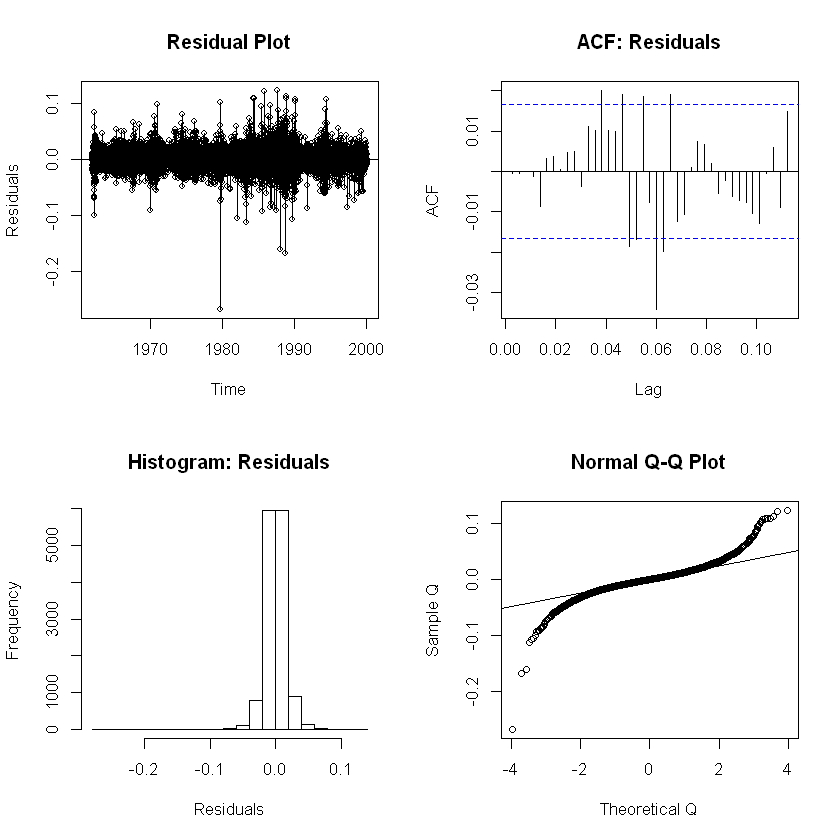

In [43]:
porder=2
qorder=0
final_model = arima(price, order = c(porder,1,qorder), method = "ML")

## GOF: residual analysis
par(mfrow=c(2,2))
plot(resid(final_model), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(final_model),main="ACF: Residuals")
hist(resid(final_model),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(final_model),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(final_model))

Box.test(final_model$resid, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(final_model$resid, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))

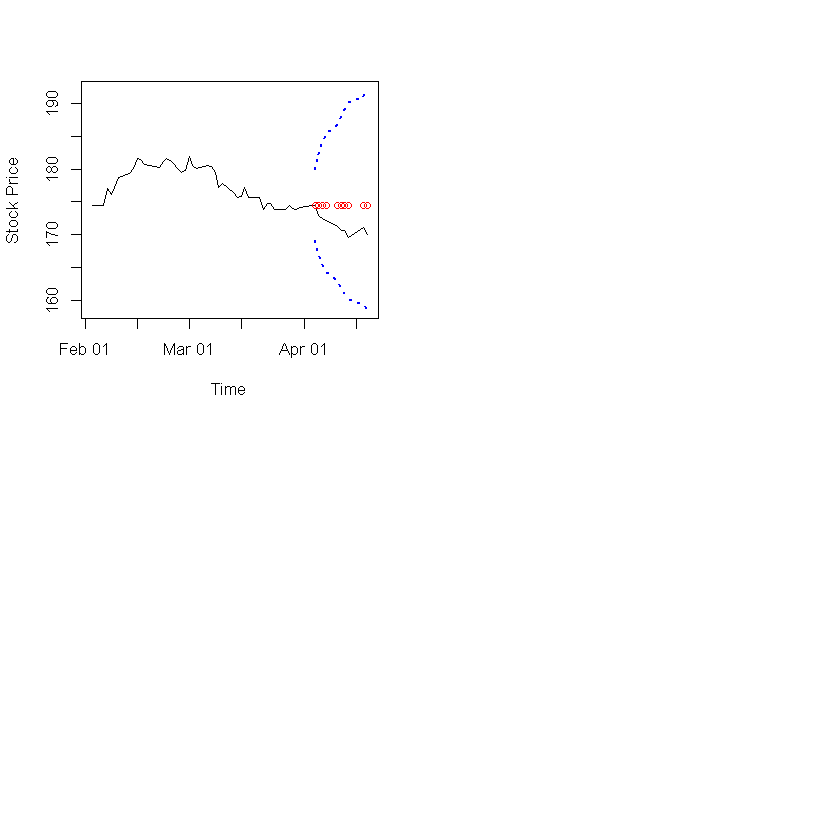

In [45]:
## Forecasting with ARIMA 
## 10 Days Ahead: 
n = length(price)
nfit = n-10
outprice = arima(ts.price[1:nfit], order = c(porder,1,qorder),method = "ML")
outpred = predict(outprice,n.ahead=10)
ubound = outpred$pred+1.96*outpred$se
lbound = outpred$pred-1.96*outpred$se
ymin = min(exp(lbound))
ymax = max(exp(ubound))


par(mfrow=c(2,2))
plot(rev(Date)[(n-50):n],exp(price[(n-50):n]),type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Stock Price")
points(rev(Date)[(nfit+1):n],exp(outpred$pred),col="red")
lines(rev(Date)[(nfit+1):n],exp(ubound),lty=3,lwd= 2, col="blue")
lines(rev(Date)[(nfit+1):n],exp(lbound),lty=3,lwd= 2, col="blue")

In [37]:
## Compute Accuracy Measures
obsprice = exp(price[(nfit+1):n]) 
predprice = exp(outpred$pred)
### Mean Squared Prediction Error (MSPE)
mean((predprice-obsprice)^2)
### Mean Absolute Prediction Error (MAE)
mean(abs(predprice-obsprice))
### Mean Absolute Percentage Error (MAPE)
mean(abs(predprice-obsprice)/obsprice)
### Precision Measure (PM)
sum((predprice-obsprice)^2)/sum((obsprice-mean(obsprice))^2)

[1] 10.84362

[1] 2.978541

[1] 0.01743502

[1] 5.389178

In [47]:
### Does the observed data fall outside the prediction intervals?
sum(obsprice<exp(lbound))+sum(obsprice>exp(ubound))

## Daily Prediction over a period of 10 days 
outpred.10 = NULL
ubound.10 = NULL
lbound.10 = NULL
n = length(price)
for(i in 1:10){
   nfit = n-(10-i-1)
   outprice = arima(price[1:nfit], order = c(porder,1,qorder),method = "ML")
   pred.1 = predict(outprice,n.ahead=1)
   outpred.10 = c(outpred.10,pred.1$pred)
   ubound.10 = c(ubound.10, pred.1$pred+1.96*pred.1$se)
   lbound.10 = c(lbound.10, pred.1$pred-1.96*pred.1$se)
  }


[1] 0

In [48]:
## Compute Accuracy Measures 
predprice.10 = exp(outpred.10)
### Mean Squared Prediction Error (MSPE)
mean((predprice.10-obsprice)^2)
### Mean Absolute Prediction Error (MAE)
mean(abs(predprice.10-obsprice))
### Mean Absolute Percentage Error (MAPE)
mean(abs(predprice.10-obsprice)/obsprice)
### Precision Measure (PM)
sum((predprice.10-obsprice)^2)/sum((obsprice-mean(obsprice))^2)

### Does the observed data fall outside the prediction intervals?
sum(obsprice<exp(lbound.10))+sum(obsprice>exp(ubound.10))


[1] 0.8909682

[1] 0.7667641

[1] 0.004466037

[1] 0.4428029

[1] 0

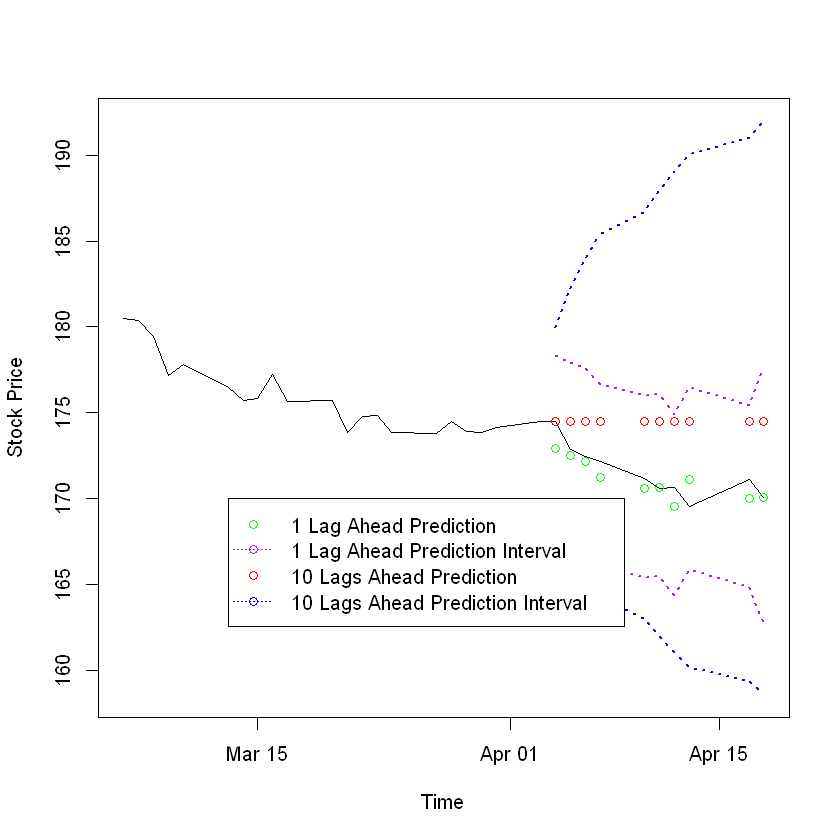

In [49]:
nfit = n-10
ymin = min(exp(c(lbound,lbound.10)))
ymax = max(exp(c(ubound,ubound.10)))
plot(rev(Date)[(n-30):n],exp(ts.price[(n-30):n]),type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Stock Price")
points(rev(Date)[(nfit+1):n],exp(outpred$pred),col="red")
lines(rev(Date)[(nfit+1):n],exp(ubound),lty=3,lwd= 2, col="blue")
lines(rev(Date)[(nfit+1):n],exp(lbound),lty=3,lwd= 2, col="blue")
points(rev(Date)[(nfit+1):n],exp(outpred.10),col="green")
lines(rev(Date)[(nfit+1):n],exp(ubound.10),lty=3,lwd= 2, col="purple")
lines(rev(Date)[(nfit+1):n],exp(lbound.10),lty=3,lwd= 2, col="purple")
legend(rev(Date)[n-25],170,legend=c("1 Lag Ahead Prediction", "1 Lag Ahead Prediction Interval",
"10 Lags Ahead Prediction","10 Lags Ahead Prediction Interval" ),col=c("green","purple","red","blue"),pch=1,lty = c(0,3,0,3))
